<a href="https://colab.research.google.com/github/Haider3012s/SafeRoads-AI/blob/main/Ml_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
import pandas as pd
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np

In [2]:
df = pd.read_csv('/content/DS1.csv')

print("Dataset shape:", df.shape)
df.head(5)

Dataset shape: (38411, 38)


<ipython-input-2-bfd1336fbb5f>:3: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/DS1.csv')


,status,collision_index,collision_year,collision_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,legacy_collision_severity,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_collision,trunk_road_flag,lsoa_of_collision_location,enhanced_severity_collision
0,Unvalidated,2024010486807,2024,10486807,527188.0,184782.0,NaN,NaN,1,3,...,4.0,1.0,1.0,0.0,0.0,-1.0,3.0,-1.0,-1.0,-1.0
1,Unvalidated,2024010486821,2024,10486821,528936.0,194721.0,NaN,NaN,1,3,...,4.0,4.0,2.0,9.0,0.0,-1.0,3.0,-1.0,-1.0,-1.0
2,Unvalidated,2024010486824,2024,10486824,552699.0,185940.0,NaN,NaN,1,3,...,4.0,8.0,2.0,0.0,0.0,-1.0,1.0,-1.0,-1.0,-1.0
3,Unvalidated,2024010486825,2024,10486825,545623.0,177185.0,NaN,NaN,1,3,...,4.0,1.0,1.0,0.0,0.0,-1.0,1.0,-1.0,-1.0,-1.0
4,Unvalidated,2024010486828,2024,10486828,536554.0,178468.0,NaN,NaN,1,3,...,4.0,4.0,2.0,0.0,0.0,-1.0,1.0,-1.0,-1.0,-1.0


In [16]:
df.info()
missing = df.isna().sum().sort_values(ascending=False)
missing.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38411 entries, 0 to 38410
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   collision_year                                38411 non-null  int64         
 1   location_easting_osgr                         38411 non-null  float64       
 2   location_northing_osgr                        38411 non-null  float64       
 3   police_force                                  38411 non-null  int64         
 4   legacy_collision_severity                     38411 non-null  int64         
 5   number_of_vehicles                            38411 non-null  int64         
 6   number_of_casualties                          38411 non-null  int64         
 7   date                                          14983 non-null  datetime64[ns]
 8   day_of_week                                   38411 non-null  int6

,0
date,23428
trunk_road_flag,1
road_type,1
speed_limit,1
junction_detail,1
first_road_number,1
first_road_class,1
carriageway_hazards,1
special_conditions_at_site,1
road_surface_conditions,1


In [ ]:
df = df.drop(columns=['latitude', 'longitude'])

df['location_easting_osgr'].fillna(df['location_easting_osgr'].median(), inplace=True)
df['location_northing_osgr'].fillna(df['location_northing_osgr'].median(), inplace=True)

In [5]:
df.dtypes

print(df['enhanced_severity_collision'].value_counts())
print(df['enhanced_severity_collision'].unique())


enhanced_severity_collision
 3.0    16540
-1.0    15658
 7.0     3546
 6.0     1286
 5.0     1026
 1.0      354
Name: count, dtype: int64
[-1.  3.  1.  7.  6.  5. nan]


In [6]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['status', 'collision_index', 'collision_reference', 'time',
       'local_authority_ons_district', 'local_authority_highway'],
      dtype='object')


In [7]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

status: ['Unvalidated']
collision_index: [2024010486807 2024010486821 2024010486824 ... 2024471439899 2024471439932
 2024471439935]
collision_reference: [10486807 10486821 10486824 ... 471439899 471439932 471439935]
time: ['01:00' '01:42' '02:23' ... '05:37' '04:24' '00:34']
local_authority_ons_district: ['E09000007' 'E09000010' 'E09000016' 'E09000011' 'E09000023' 'E09000022'
 'E09000014' 'E09000033' 'E09000012' 'E09000027' 'E09000030' 'E09000015'
 'E09000019' 'E09000025' 'E09000004' 'E09000026' 'E09000005' 'E09000006'
 'E09000003' 'E09000018' 'E09000017' 'E09000028' 'E09000021' 'E09000009'
 'E09000032' 'E09000031' 'E09000002' 'E09000020' 'E09000024' 'E09000008'
 'E09000029' 'E09000013' 'EHEATHROW' 'E06000063' 'E06000064' 'E07000121'
 'E07000126' 'E07000118' 'E06000009' 'E07000127' 'E07000122' 'E07000123'
 'E07000119' 'E07000117' 'E07000124' 'E06000008' 'E07000120' 'E07000128'
 'E07000125' 'E08000013' 'E08000015' 'E08000012' 'E08000011' 'E08000014'
 'E08000008' 'E08000003' 'E08000005' 

In [8]:
df.drop(['status', 'collision_index', 'collision_reference'], axis=1, inplace=True)

df['hour'] = pd.to_datetime(df['time'], format='%H:%M', errors='coerce').dt.hour
df.drop('time', axis=1, inplace=True)


df['local_authority_ons_district'] = LabelEncoder().fit_transform(df['local_authority_ons_district'])
df['local_authority_highway'] = LabelEncoder().fit_transform(df['local_authority_highway'])


In [9]:
X = df.drop('enhanced_severity_collision', axis=1)
y = df['enhanced_severity_collision']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()


X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [41]:

X_numeric = X.select_dtypes(include=['int64', 'float64'])

imputer = SimpleImputer(strategy='mean')
X_numeric_imputed = pd.DataFrame(imputer.fit_transform(X_numeric), columns=X_numeric.columns)


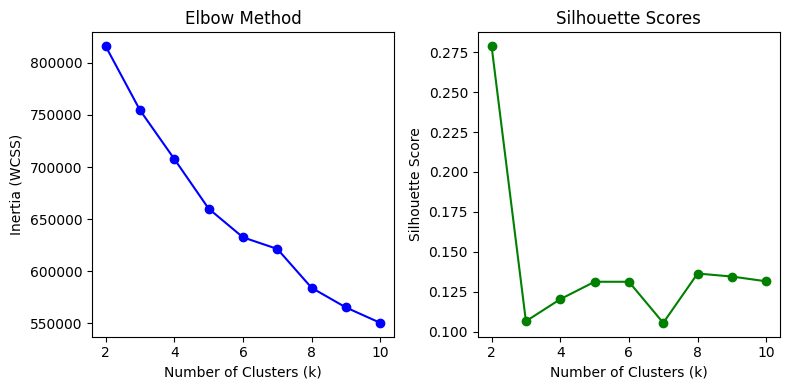

In [23]:
#necessary for k means
X_numeric = X.select_dtypes(include=['int64', 'float64'])

inertia = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_numeric_imputed)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_numeric_imputed, kmeans.labels_)
    silhouette_scores.append(score)

# Elbow Curve
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')

# Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')

plt.tight_layout()
plt.show()


In [26]:
# optimal k = 7
kmeans_final = KMeans(n_clusters=7, random_state=42)
kmeans_labels = kmeans_final.fit_predict(X_numeric_imputed)

df['KMeans_Cluster'] = kmeans_labels

In [37]:
agg = AgglomerativeClustering(n_clusters=7)
agg_labels = agg.fit_predict(X_numeric_imputed)
df['Agglomerative_Cluster'] = agg_labels

In [33]:
#KMeans Clustering
kmeans_silhouette = silhouette_score(X_numeric_imputed, df['KMeans_Cluster'])
kmeans_calinski = calinski_harabasz_score(X_numeric_imputed, df['KMeans_Cluster'])

print("KMeans Clustering Evaluation:")
print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Calinski-Harabasz Score: {kmeans_calinski:.2f}")

KMeans Clustering Evaluation:
Silhouette Score: 0.1057
Calinski-Harabasz Score: 3489.58


In [38]:
# Agglomerative
agg_silhouette = silhouette_score(X_numeric_imputed, agg_labels)
agg_calinski = calinski_harabasz_score(X_numeric_imputed, agg_labels)

print("\nAgglomerative Clustering Evaluation:")
print(f"Silhouette Score: {agg_silhouette:.4f}")
print(f"Calinski-Harabasz Score: {agg_calinski:.2f}")


Agglomerative Clustering Evaluation:
Silhouette Score: 0.1009
Calinski-Harabasz Score: 3193.66


In [46]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

n_features_to_select = int(X_numeric.shape[1] / 2)
rfe = RFE(estimator=rf, n_features_to_select=n_features_to_select)

rfe.fit(X_numeric_imputed_clean, y_clean)

selected_features_mask = rfe.support_

selected_features = X_numeric.columns[selected_features_mask]

print("Selected Features by RF-RFE:")
print(selected_features)

X_selected = X_numeric[selected_features]

Selected Features by RF-RFE:
Index(['location_easting_osgr', 'location_northing_osgr', 'police_force',
       'legacy_collision_severity', 'day_of_week',
       'local_authority_ons_district', 'local_authority_highway',
       'first_road_number', 'speed_limit', 'junction_detail',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'special_conditions_at_site',
       'carriageway_hazards'],
      dtype='object')


In [45]:
print(y.isnull().sum())
mask = y.notnull()
X_numeric_imputed_clean = X_numeric_imputed[mask]
y_clean = y[mask]
print(y_clean.isnull().sum())

1
0


enhanced_severity_collision
 3.0    16540
-1.0    15658
 7.0     3546
 6.0     1286
 5.0     1026
 1.0      354
Name: count, dtype: int64
enhanced_severity_collision
 3.0    0.430617
-1.0    0.407654
 7.0    0.092320
 6.0    0.033481
 5.0    0.026712
 1.0    0.009216
Name: proportion, dtype: float64


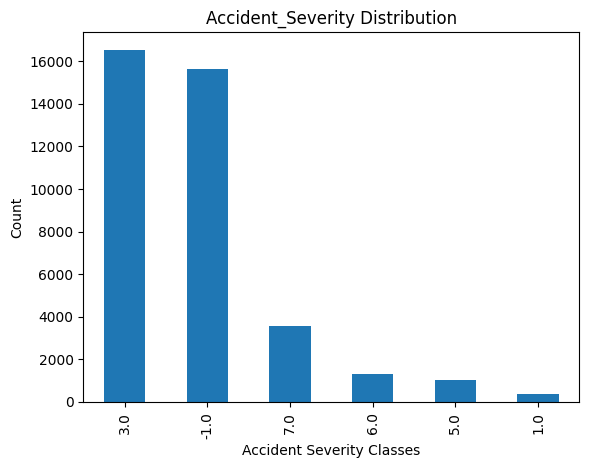

In [47]:
print(y_clean.value_counts())

print(y_clean.value_counts(normalize=True))

y_clean.value_counts().plot(kind='bar')
plt.title('Accident_Severity Distribution')
plt.xlabel('Accident Severity Classes')
plt.ylabel('Count')
plt.show()


In [53]:
print("Original class distribution:", Counter(y_clean))

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_aligned, y_aligned)
print("After SMOTE oversampling:", Counter(y_smote))

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_selected_imputed, y_clean)
print("After Random Under Sampling:", Counter(y_rus))


Original class distribution: Counter({3.0: 16540, -1.0: 15658, 7.0: 3546, 6.0: 1286, 5.0: 1026, 1.0: 354})
After SMOTE oversampling: Counter({-1.0: 16540, 3.0: 16540, 1.0: 16540, 7.0: 16540, 6.0: 16540, 5.0: 16540})
After Random Under Sampling: Counter({-1.0: 354, 1.0: 354, 3.0: 354, 5.0: 354, 6.0: 354, 7.0: 354})


In [51]:
common_index = X_selected_imputed.index.intersection(y_clean.index)
X_aligned = X_selected_imputed.loc[common_index]
y_aligned = y_clean.loc[common_index]

print(len(X_aligned), len(y_aligned))

X_smote, y_smote = smote.fit_resample(X_aligned, y_aligned)
print("After SMOTE oversampling:", Counter(y_smote))


38410 38410
After SMOTE oversampling: Counter({-1.0: 16540, 3.0: 16540, 1.0: 16540, 7.0: 16540, 6.0: 16540, 5.0: 16540})


In [49]:
imputer = SimpleImputer(strategy='median')

X_selected_imputed = imputer.fit_transform(X_selected)

X_selected_imputed = pd.DataFrame(X_selected_imputed, columns=X_selected.columns)

print("Missing values after imputation:", X_selected_imputed.isnull().sum().sum())


Missing values after imputation: 0


In [58]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_smote, y_smote_encoded)
    y_pred = model.predict(X_smote)

    acc = accuracy_score(y_smote_encoded, y_pred)
    prec = precision_score(y_smote_encoded, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_smote_encoded, y_pred, average='weighted')
    f1 = f1_score(y_smote_encoded, y_pred, average='weighted')

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_smote_encoded, y_pred, zero_division=0))
    print("Confusion Matrix:")
    print(confusion_matrix(y_smote_encoded, y_pred))
    print("-" * 50)

    results[name] = {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1_score": f1
    }


Training Logistic Regression...
Accuracy: 0.6586
Precision: 0.6645
Recall: 0.6586
F1 Score: 0.6575
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83     16540
           1       0.99      1.00      1.00     16540
           2       0.84      0.95      0.89     16540
           3       0.40      0.51      0.45     16540
           4       0.40      0.31      0.35     16540
           5       0.43      0.43      0.43     16540

    accuracy                           0.66     99240
   macro avg       0.66      0.66      0.66     99240
weighted avg       0.66      0.66      0.66     99240

Confusion Matrix:
[[12368   120  2955   459   120   518]
 [    0 16540     0     0     0     0]
 [  822     0 15718     0     0     0]
 [   65     0     0  8516  3954  4005]
 [  100     0     0  6405  5098  4937]
 [   53     0     0  5686  3682  7119]]
--------------------------------------------------
Training SVM...
Accuracy: 0.743

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:53:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9252
Precision: 0.9253
Recall: 0.9252
F1 Score: 0.9251
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16540
           1       1.00      1.00      1.00     16540
           2       1.00      1.00      1.00     16540
           3       0.86      0.89      0.87     16540
           4       0.84      0.85      0.84     16540
           5       0.86      0.81      0.84     16540

    accuracy                           0.93     99240
   macro avg       0.93      0.93      0.93     99240
weighted avg       0.93      0.93      0.93     99240

Confusion Matrix:
[[16540     0     0     0     0     0]
 [    0 16540     0     0     0     0]
 [    0     0 16540     0     0     0]
 [    0     0     0 14697  1014   829]
 [    0     0     0  1122 14070  1348]
 [    0     0     0  1353  1753 13434]]
--------------------------------------------------
Training Gradient Boosting...
Accuracy: 0.7813
Precision: 0.781

In [55]:
label_encoder = LabelEncoder()

y_smote_encoded = label_encoder.fit_transform(y_smote)

print("Encoded class labels:", np.unique(y_smote_encoded))

Encoded class labels: [0 1 2 3 4 5]


DS2 is imported from sklearn datasets


In [60]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')

print(X.shape)
print(X.head())
print(y.value_counts())


(569, 30)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0 

Original shape: (569, 30)
PCA-transformed shape: (569, 10)


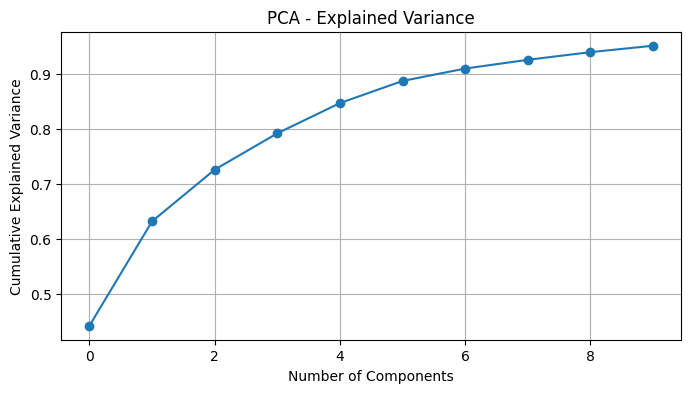

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Original shape: {X.shape}")
print(f"PCA-transformed shape: {X_pca.shape}")


plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)
plt.show()


In [62]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

input_dim = X_scaled.shape[1]
encoding_dim = 10

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='linear')(encoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
encoder = Model(inputs=input_layer, outputs=encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, shuffle=True, verbose=0)

X_autoencoded = encoder.predict(X_scaled)

print(f"Autoencoder-transformed shape: {X_autoencoded.shape}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Autoencoder-transformed shape: (569, 10)


In [63]:
from sklearn.model_selection import train_test_split


X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_ae_train, X_ae_test, y_ae_train, y_ae_test = train_test_split(X_autoencoded, y, test_size=0.2, random_state=42)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    print(f"\n=== {name} on PCA Features ===")
    model.fit(X_pca_train, y_pca_train)
    y_pca_pred = model.predict(X_pca_test)
    print(f"Accuracy: {accuracy_score(y_pca_test, y_pca_pred):.4f}")
    print(classification_report(y_pca_test, y_pca_pred))

    print(f"\n=== {name} on Autoencoder Features ===")
    model.fit(X_ae_train, y_ae_train)
    y_ae_pred = model.predict(X_ae_test)
    print(f"Accuracy: {accuracy_score(y_ae_test, y_ae_pred):.4f}")
    print(classification_report(y_ae_test, y_ae_pred))



=== Logistic Regression on PCA Features ===
Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


=== Logistic Regression on Autoencoder Features ===
Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


=== Random Forest on PCA Features ===
Accuracy: 0.9561
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96      